Use digits mnist dataset and fashion mnist dataset to build a neural network

In [59]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [61]:
X_train = X_train/255
X_test = X_test/255

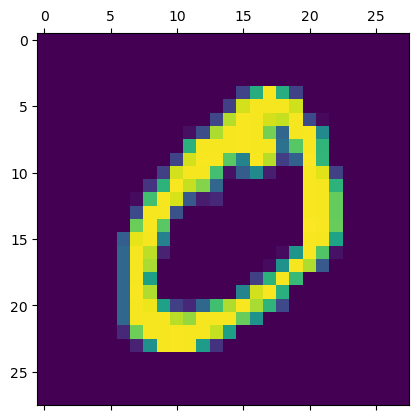

In [62]:
plt.matshow(X_train[1])

In [63]:
y_train[1]

0

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 20)                15700     
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [67]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 1s 653us/step - loss: 0.4016 - accuracy: 0.8875


In [68]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 533us/step - loss: 0.2500 - accuracy: 0.9291


[0.24997609853744507, 0.929099977016449]

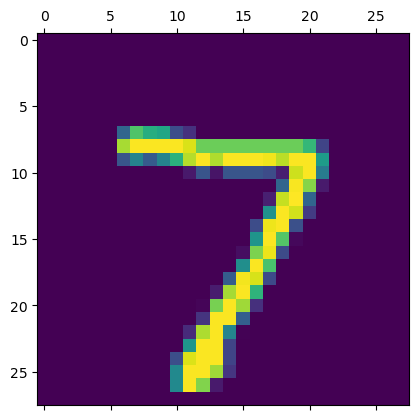

In [69]:
plt.matshow(X_test[0])

In [70]:
np.argmax(model.predict(X_test)[0])


313/313 [==============================] - 0s 441us/step


7

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [72]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_labels.shape

(60000,)

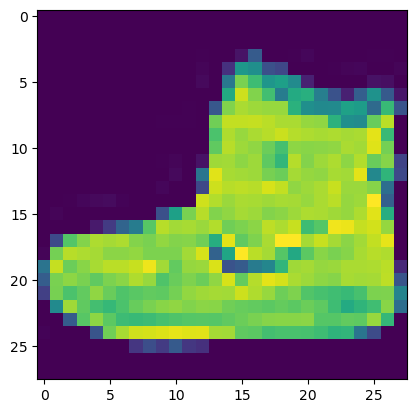

In [76]:
plt.imshow(train_images[0])

In [77]:
train_labels[0]

9

In [78]:
class_names[train_labels[0]]

'Ankle boot'

In [79]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [80]:
def get_model(hidden_layers=1):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [81]:
model = get_model(1)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3204 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8967


In [82]:
class_names[test_labels[0]]

'Ankle boot'

In [83]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

i. Build a deep learning model to predict churn rate at bank. <br>
ii. Once model is built, print classification report and analyze precision, recall and f1-score <br>
iii. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6853,6854,15593943,Chinagorom,685,France,Female,43,1,132667.17,1,1,1,41876.98,0
2723,2724,15681550,Lablanc,614,France,Female,41,8,121558.46,1,1,1,598.80,0
2348,2349,15775203,Chia,824,France,Male,45,3,129209.48,1,0,0,60151.77,0
1491,1492,15634891,Jamison,504,Germany,Female,43,7,102365.49,1,1,0,194690.77,1
9032,9033,15658435,Hingston,781,France,Female,27,5,0.00,2,0,0,72969.90,0


In [5]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df_dropped = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_dropped.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6228,663,Germany,Male,42,5,90248.79,1,1,1,79169.73,0
9731,607,Germany,Male,29,7,102609.00,1,1,0,163257.44,0
9789,610,France,Female,45,1,0.00,2,1,1,199657.46,0
61,687,Germany,Female,27,9,152328.88,2,0,0,126494.82,0
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0


In [7]:
df_dropped.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df_with_dummies = pd.get_dummies(data=df_dropped, drop_first=True)
df_with_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
df_with_dummies.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [13]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])
df_with_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,1,0,1


In [15]:
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop("Exited", axis=1)
y = df_with_dummies["Exited"]
X_test, X_train, y_test, y_train= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
len(X_train.columns)

11

In [68]:
def ANN(X_train, X_test, y_train, y_test):
    model= keras.Sequential([
        keras.layers.Dense(11, activation='relu', input_dim=11),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation= 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    model.evaluate(X_test, y_test)
    y_pred= np.round(model.predict(X_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred
     


In [40]:
y_pred = ANN(X_train, X_test, y_train, y_test) 

Epoch 1/100
63/63 [==============================] - 0s 835us/step - loss: 0.7792 - accuracy: 0.2730
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5980
Epoch 3/100
63/63 [==============================] - 0s 723us/step - loss: 0.5775 - accuracy: 0.7915
Epoch 4/100
63/63 [==============================] - 0s 732us/step - loss: 0.5232 - accuracy: 0.7965
Epoch 5/100
63/63 [==============================] - 0s 733us/step - loss: 0.5117 - accuracy: 0.7965
Epoch 6/100
63/63 [==============================] - 0s 727us/step - loss: 0.5048 - accuracy: 0.7965
Epoch 7/100
63/63 [==============================] - 0s 734us/step - loss: 0.4987 - accuracy: 0.7965
Epoch 8/100
63/63 [==============================] - 0s 771us/step - loss: 0.4918 - accuracy: 0.7965
Epoch 9/100
63/63 [==============================] - 0s 776us/step - loss: 0.4830 - accuracy: 0.7965
Epoch 10/100
63/63 [==============================] - 0s 746us/step - loss: 0.4735 - accuracy

# Undersampling

In [32]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
1344,0.220,0.297297,0.6,0.476319,0.333333,1,0,0.457789,1,0,0,1
8167,0.726,0.081081,0.7,0.588634,0.000000,1,1,0.607963,1,0,0,0
4747,0.626,0.621622,0.6,0.000000,0.333333,0,1,0.079332,0,1,1,0
5004,0.304,0.527027,0.3,0.404408,0.000000,1,0,0.217804,1,0,0,1
3124,0.820,0.283784,0.6,0.711785,0.000000,1,0,0.335631,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9107,0.610,0.270270,0.9,0.000000,0.000000,0,1,0.452437,0,1,1,0
8249,0.472,0.270270,0.6,0.000000,0.333333,1,1,0.189639,0,0,0,0
8337,0.368,0.310811,0.9,0.000000,0.333333,1,0,0.069305,0,0,1,0
6279,0.814,0.500000,0.9,0.467497,1.000000,1,0,0.470924,0,1,0,1


In [33]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [34]:
len(df_0), len(df_1)

(1593, 407)

In [45]:
df_0 = df_0.sample(407)
df_undersampled = pd.concat([df_0, df_1], axis=0)
df_undersampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
9967,0.546,0.405405,0.5,0.472181,0.000000,1,1,0.792969,0,0,1,0
6401,0.412,0.378378,1.0,0.000000,0.333333,0,0,0.545915,0,0,0,0
919,0.404,0.364865,0.9,0.000000,0.333333,1,0,0.133718,0,1,1,0
1226,0.362,0.324324,0.6,0.352033,0.333333,1,0,0.376222,1,0,0,0
7046,0.478,0.027027,0.2,0.482639,0.333333,1,0,0.017592,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8379,0.168,0.500000,0.6,0.000000,0.000000,0,1,0.367787,0,1,1,1
7223,0.898,0.175676,0.9,0.616134,0.000000,0,1,0.443009,1,0,1,1
1046,0.914,0.324324,0.1,0.000000,0.000000,1,0,0.082453,0,1,0,1
1487,0.720,0.445946,0.4,0.373287,0.000000,0,1,0.707012,0,1,0,1


In [48]:
X = df_undersampled.drop("Exited", axis=1)
y = df_undersampled["Exited"]
ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 923us/step - loss: 0.6938 - accuracy: 0.4939
Epoch 2/100
26/26 [==============================] - 0s 798us/step - loss: 0.6907 - accuracy: 0.5197
Epoch 3/100
26/26 [==============================] - 0s 853us/step - loss: 0.6893 - accuracy: 0.5233
Epoch 4/100
26/26 [==============================] - 0s 857us/step - loss: 0.6875 - accuracy: 0.5258
Epoch 5/100
26/26 [==============================] - 0s 788us/step - loss: 0.6853 - accuracy: 0.5344
Epoch 6/100
26/26 [==============================] - 0s 827us/step - loss: 0.6830 - accuracy: 0.5442
Epoch 7/100
26/26 [==============================] - 0s 843us/step - loss: 0.6804 - accuracy: 0.5639
Epoch 8/100
26/26 [==============================] - 0s 835us/step - loss: 0.6779 - accuracy: 0.5811
Epoch 9/100
26/26 [==============================] - 0s 875us/step - loss: 0.6738 - accuracy: 0.5946
Epoch 10/100
26/26 [==============================] - 0s 881us/step - loss: 0.6686 - accura

In [49]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [50]:
len(df_0), len(df_1)

(1593, 407)

In [51]:
df_1 = df_1.sample(1593, replace=True)

In [52]:
len(df_0), len(df_1)

(1593, 1593)

In [53]:
df_oversampled = pd.concat([df_0, df_1])
df_oversampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
8167,0.726,0.081081,0.7,0.588634,0.000000,1,1,0.607963,1,0,0,0
4747,0.626,0.621622,0.6,0.000000,0.333333,0,1,0.079332,0,1,1,0
2090,0.634,0.283784,0.9,0.000000,0.333333,1,0,0.344344,0,1,1,0
3298,0.416,0.094595,1.0,0.443858,0.333333,1,0,0.986358,1,0,1,0
9485,1.000,0.256757,0.4,0.351302,0.000000,1,0,0.548290,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.880,0.378378,0.9,0.000000,0.000000,0,0,0.073348,0,1,0,1
399,0.532,0.648649,0.1,0.541425,0.000000,1,0,0.919232,0,0,0,1
6279,0.814,0.500000,0.9,0.467497,1.000000,1,0,0.470924,0,1,0,1
338,0.910,0.283784,0.5,0.658722,0.000000,1,0,0.070498,0,1,0,1


In [54]:
X = df_oversampled.drop("Exited", axis=1)
y = df_oversampled["Exited"]
ANN(X, X_test,y, y_test)

Epoch 1/100
100/100 [==============================] - 0s 766us/step - loss: 0.6752 - accuracy: 0.5876
Epoch 2/100
100/100 [==============================] - 0s 703us/step - loss: 0.6542 - accuracy: 0.6337
Epoch 3/100
100/100 [==============================] - 0s 729us/step - loss: 0.6373 - accuracy: 0.6416
Epoch 4/100
100/100 [==============================] - 0s 726us/step - loss: 0.6255 - accuracy: 0.6441
Epoch 5/100
100/100 [==============================] - 0s 774us/step - loss: 0.6179 - accuracy: 0.6513
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6610
Epoch 7/100
100/100 [==============================] - 0s 729us/step - loss: 0.6053 - accuracy: 0.6704
Epoch 8/100
100/100 [==============================] - 0s 742us/step - loss: 0.5992 - accuracy: 0.6742
Epoch 9/100
100/100 [==============================] - 0s 708us/step - loss: 0.5935 - accuracy: 0.6868
Epoch 10/100
100/100 [==============================] - 0s 709us/step - los

# Oversample SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [57]:
ANN(X_sm, X_test,y_sm, y_test)

Epoch 1/100
100/100 [==============================] - 0s 773us/step - loss: 0.6666 - accuracy: 0.5932
Epoch 2/100
100/100 [==============================] - 0s 705us/step - loss: 0.6441 - accuracy: 0.6318
Epoch 3/100
100/100 [==============================] - 0s 714us/step - loss: 0.6302 - accuracy: 0.6516
Epoch 4/100
100/100 [==============================] - 0s 719us/step - loss: 0.6180 - accuracy: 0.6692
Epoch 5/100
100/100 [==============================] - 0s 708us/step - loss: 0.6067 - accuracy: 0.6858
Epoch 6/100
100/100 [==============================] - 0s 713us/step - loss: 0.5977 - accuracy: 0.6955
Epoch 7/100
100/100 [==============================] - 0s 740us/step - loss: 0.5882 - accuracy: 0.7034
Epoch 8/100
100/100 [==============================] - 0s 736us/step - loss: 0.5796 - accuracy: 0.7056
Epoch 9/100
100/100 [==============================] - 0s 723us/step - loss: 0.5723 - accuracy: 0.7131
Epoch 10/100
100/100 [==============================] - 0s 777us/step - l

# Ensemble

In [58]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]
len(df_0), len(df_1)

(1593, 407)

In [59]:
1593//407

3

In [60]:
lst_ensemble = []
for i in range(3):
    df_ensemble = pd.concat([df_0.sample(407), df_1])
    lst_ensemble.append(df_ensemble)

In [63]:
lst_ensemble[2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
7637,0.832,0.189189,0.6,0.740198,0.000000,1,1,0.512504,0,0,1,0
994,0.976,0.337838,0.9,0.490661,0.333333,1,0,0.728841,0,1,1,0
5286,0.668,0.310811,0.1,0.534787,0.000000,0,0,0.887560,0,1,0,0
1357,0.482,0.337838,0.3,0.000000,0.333333,0,1,0.994669,0,0,1,0
7302,0.282,0.729730,0.6,0.363834,0.000000,1,1,0.035110,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8379,0.168,0.500000,0.6,0.000000,0.000000,0,1,0.367787,0,1,1,1
7223,0.898,0.175676,0.9,0.616134,0.000000,0,1,0.443009,1,0,1,1
1046,0.914,0.324324,0.1,0.000000,0.000000,1,0,0.082453,0,1,0,1
1487,0.720,0.445946,0.4,0.373287,0.000000,0,1,0.707012,0,1,0,1


In [69]:
X = lst_ensemble[0].drop("Exited", axis=1)
y = lst_ensemble[0]["Exited"]
y_pred1= ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 861us/step - loss: 0.6962 - accuracy: 0.4103
Epoch 2/100
26/26 [==============================] - 0s 761us/step - loss: 0.6940 - accuracy: 0.4447
Epoch 3/100
26/26 [==============================] - 0s 744us/step - loss: 0.6935 - accuracy: 0.4582
Epoch 4/100
26/26 [==============================] - 0s 738us/step - loss: 0.6933 - accuracy: 0.4717
Epoch 5/100
26/26 [==============================] - 0s 687us/step - loss: 0.6931 - accuracy: 0.4840
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5123
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5025
Epoch 8/100
26/26 [==============================] - 0s 794us/step - loss: 0.6925 - accuracy: 0.5049
Epoch 9/100
26/26 [==============================] - 0s 733us/step - loss: 0.6918 - accuracy: 0.5270
Epoch 10/100
26/26 [==============================] - 0s 762us/step - loss: 0.6905 - accuracy: 

In [74]:
X = lst_ensemble[1].drop("Exited", axis=1)
y = lst_ensemble[1]["Exited"]
y_pred2 = ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 884us/step - loss: 0.6659 - accuracy: 0.6069
Epoch 2/100
26/26 [==============================] - 0s 776us/step - loss: 0.6569 - accuracy: 0.6130
Epoch 3/100
26/26 [==============================] - 0s 744us/step - loss: 0.6505 - accuracy: 0.6179
Epoch 4/100
26/26 [==============================] - 0s 725us/step - loss: 0.6469 - accuracy: 0.6216
Epoch 5/100
26/26 [==============================] - 0s 698us/step - loss: 0.6418 - accuracy: 0.6388
Epoch 6/100
26/26 [==============================] - 0s 724us/step - loss: 0.6391 - accuracy: 0.6376
Epoch 7/100
26/26 [==============================] - 0s 724us/step - loss: 0.6348 - accuracy: 0.6474
Epoch 8/100
26/26 [==============================] - 0s 705us/step - loss: 0.6320 - accuracy: 0.6572
Epoch 9/100
26/26 [==============================] - 0s 725us/step - loss: 0.6287 - accuracy: 0.6585
Epoch 10/100
26/26 [==============================] - 0s 705us/step - loss: 0.6265 - accura

In [72]:
X = lst_ensemble[2].drop("Exited", axis=1)
y = lst_ensemble[2]["Exited"]
y_pred3 = ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 900us/step - loss: 0.6803 - accuracy: 0.5565
Epoch 2/100
26/26 [==============================] - 0s 864us/step - loss: 0.6633 - accuracy: 0.6143
Epoch 3/100
26/26 [==============================] - 0s 798us/step - loss: 0.6544 - accuracy: 0.6474
Epoch 4/100
26/26 [==============================] - 0s 876us/step - loss: 0.6477 - accuracy: 0.6560
Epoch 5/100
26/26 [==============================] - 0s 801us/step - loss: 0.6410 - accuracy: 0.6548
Epoch 6/100
26/26 [==============================] - 0s 839us/step - loss: 0.6348 - accuracy: 0.6671
Epoch 7/100
26/26 [==============================] - 0s 828us/step - loss: 0.6294 - accuracy: 0.6732
Epoch 8/100
26/26 [==============================] - 0s 765us/step - loss: 0.6247 - accuracy: 0.6708
Epoch 9/100
26/26 [==============================] - 0s 864us/step - loss: 0.6208 - accuracy: 0.6708
Epoch 10/100
26/26 [==============================] - 0s 799us/step - loss: 0.6163 - accura

In [76]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred_final)):
    num = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if num >= 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [77]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      6370
           1       0.37      0.80      0.50      1630

    accuracy                           0.68      8000
   macro avg       0.65      0.73      0.63      8000
weighted avg       0.81      0.68      0.71      8000

